In [1]:
import copy

import prody
from rdkit import Chem
from rdkit.Chem import Draw
from prody.proteins.functions import showProtein, view3D

from rgroup import rep2D, draw3D, merge_R_group, fix_receptor, optimise_in_receptor 

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
# load the complex with the ligand
sys = prody.parsePDB('5NEV.pdb1')
rec = sys.select('not (nucleic or hetatm) and not water')
mol = sys.select('resname 72L')

prody.writePDB('rec.pdb', rec)
# prody.writePDB('lig.pdb', mol)

@> 4485 atoms and 1 coordinate set(s) were parsed in 0.04s.


'rec.pdb'

In [3]:
!wget 'https://models.rcsb.org/v1/5nev/ligand?auth_seq_id=301&label_asym_id=E&encoding=sdf&filename=5nev_E_72L.sdf' -O lig.sdf
!obabel lig.sdf -O ligh.sdf -h -p 7
# ^manually modify the files if need be

zsh:1: command not found: wget
zsh:1: command not found: obabel


In [4]:
# load the ligand
# rdkit doesn't do a good job with protonation, 
#init_mol = Chem.MolFromPDBFile('lig.pdb', removeHs=False)
#init_mol = Chem.AddHs(init_mol, addCoords=True)

init_mol = Chem.SDMolSupplier('ligh.sdf', removeHs=False)[0]

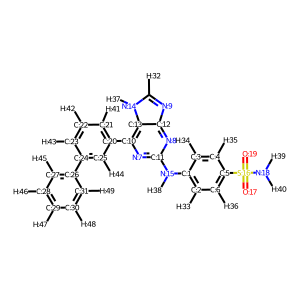

In [5]:
# select the atom to be replaced with the R group
Draw.MolToImage(rep2D(init_mol))

In [6]:
# load the R group
R_group = Chem.MolFromMolFile('data/rgroups/molecules/alcohols/propane-1_2_3-triol-r.mol', removeHs=False)
draw3D(R_group)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
rmol = merge_R_group(init_mol, R_group, 47)
rmol.draw3D()

Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x12e39b280> neighbouring <rdkit.Chem.rdchem.Atom object at 0x12e39b160>


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

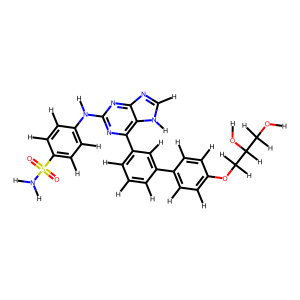

In [8]:
Draw.MolToImage(rep2D(rmol, idx=False))

In [9]:
toxicity = rmol.toxicity()
toxicity

MW  HBA  HBD    LogP  Pass_Ro5  has_pains  has_unwanted_subs
0  532.152889    9    5  2.8099      True      False              False

In [10]:
# visualise the template
# draw3D(rmol.template)

In [11]:
rmol.draw3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
rmol.generate_conformers(num_conf=30, minimum_conf_rms=0.5)

removed 3 duplicated conformations


In [13]:
rmol.draw3Dconfs()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
rmol.GetNumConformers()

27

In [15]:
# fix the receptor file 
fix_receptor("rec.pdb", "rec_h.pdb")
# load back into prody
rec_fix = prody.parsePDB("rec_h.pdb")

@> 8925 atoms and 1 coordinate set(s) were parsed in 0.06s.


In [16]:
# filter by the protein clashes

view = view3D(rec_fix)
rmol.draw3Dconfs(view)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
rmol.removeConfsClashingWithProdyProt(rec_fix)

Clash with the protein. Removing conformer id: 19
Clash with the protein. Removing conformer id: 16


In [18]:
view = view3D(rec_fix)
rmol.draw3Dconfs(view)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
 final_mol, energies = optimise_in_receptor(rmol, "rec_h.pdb", "openff", False)

Warning (not error because allow_undefined_stereo=True): Unable to make OFFMol from RDMol: RDMol has unspecified stereochemistry. RDMol name: 72LUndefined chiral centers are:
 - Atom C (index 54)

Warning (not error because allow_undefined_stereo=True): Unable to make OFFMol from RDMol: RDMol has unspecified stereochemistry. Undefined chiral centers are:
 - Atom C (index 5)

Optimising conformer: 100%|█████████████████████| 25/25 [00:07<00:00,  3.53it/s]


In [20]:
type(final_mol)
final_mol.draw3Dconfs()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
final_mol.to_file("optimised_corrds.pdb")

In [22]:
print(energies)

[43971.804792065006, 43965.0230043021, 43979.37081739961, 43989.42399617591, 43988.78913718929, 43978.004003346075, 43990.197030353724, 43966.64002748566, 43971.334249521984, 43977.99653441682, 43965.79977294455, 43976.94714985659, 43973.29110898661, 43980.86460325048, 43963.82050669216, 43970.482791587, 43966.330066921604, 43982.76918021032, 43966.016371892925, 43958.988109464626, 43989.00573613767, 43957.322538240915, 43965.52342256214, 43964.57860301147, 43973.096916826]
